In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
df=  pd.read_excel('우울증_통계청_명수.xlsx',index_col="구분")

df.head()

,2018년0점,2018년1점,2018년2점,2018년3점,2018년4점,2018년5점,2018년6점,2018년7점,2018년8점,2018년9점,...,2022년1점,2022년2점,2022년3점,2022년4점,2022년5점,2022년6점,2022년7점,2022년8점,2022년9점,2022년10점
구분,,,,,,,,,,,,,,,,,,,,,
도시(동부),848,1448,1640,1344,752,1088,416,256,128,40,...,1344,1872,1360,760,1104,576,336,128,8,8
농어촌(읍면부),848,1064,1416,1432,880,1416,552,232,96,40,...,1520,2184,1320,624,1120,344,176,72,24,8
남자,864,1400,1592,1328,728,1216,400,240,144,40,...,1392,1888,1320,776,1160,496,296,104,8,8
여자,832,1376,1624,1384,824,1064,480,272,96,32,...,1352,1960,1384,696,1056,584,328,128,16,8
19~29세,840,1464,1536,1432,896,1024,472,224,88,16,...,1568,1864,1224,808,1264,376,312,80,0,8


In [84]:
## 우울감을 느끼지 않는 소계
a = ['18','19','20','21','22']
b = ['6','7','8','9','10']
dp_0_train = df.copy()
for i in range(0, len(b)):
    dp_0_train = dp_0_train.drop([f'20{a[0]}년{b[i]}점'], axis=1)
    dp_0_train = dp_0_train.drop([f'20{a[1]}년{b[i]}점'], axis=1)
    dp_0_train = dp_0_train.drop([f'20{a[2]}년{b[i]}점'], axis=1)
    dp_0_train = dp_0_train.drop([f'20{a[3]}년{b[i]}점'], axis=1)
    dp_0_train = dp_0_train.drop([f'20{a[4]}년{b[i]}점'], axis=1)
dp_0_train.head()
dp_0_train['2018년소계'] = dp_0_train.iloc[:,:6].sum(axis=1)

dp_0_train['2019년소계'] = dp_0_train.iloc[:,6:12].sum(axis=1)
dp_0_train['2020년소계'] = dp_0_train.iloc[:,12:18].sum(axis=1)
dp_0_train['2021년소계'] = dp_0_train.iloc[:,18:24].sum(axis=1)
dp_0_train['2022년소계'] = dp_0_train.iloc[:,24:30].sum(axis=1)
dp_0_train['총계'] = dp_0_train.iloc[:,30:35].sum(axis=1)
dp_0_total = dp_0_train.iloc[:,-6:]
dp_0_total = dp_0_total.reset_index(level=None,drop=False)

# dp_0_total= pd.get_dummies(dp_0_train,drop_first=True,dtype='int')
# dp_0_total
dp_0_total.to_excel("우울_통계청_소계.xlsx")


In [126]:
train  = pd.read_excel("우울_통계청_소계.xlsx")
train.columns

Index(['Unnamed: 0', '구분', '2018년소계', '2019년소계', '2020년소계', '2021년소계',
       '2022년소계', '총계'],
      dtype='object')

In [127]:

train = train.drop(["Unnamed: 0"],axis=1)


In [128]:
train

,구분,2018년소계,2019년소계,2020년소계,2021년소계,2022년소계,총계
0,도시(동부),7120,6632,6880,6296,6944,33872
1,농어촌(읍면부),7056,6640,7064,6496,7368,34624
2,남자,7128,6616,6904,6408,7080,34136
3,여자,7104,6672,6912,6248,6944,33880
4,19~29세,7192,6584,7104,6272,7224,34376
5,30~39세,7168,6624,6872,6464,6776,33904
6,40~49세,7096,6632,6880,6376,6992,33976
7,50~59세,7056,6760,6880,6344,7152,34192
8,60세 이상,7048,6552,6800,6192,6952,33544
9,전문관리,6784,6784,7240,6128,6656,33592


In [129]:
train.head()

,구분,2018년소계,2019년소계,2020년소계,2021년소계,2022년소계,총계
0,도시(동부),7120,6632,6880,6296,6944,33872
1,농어촌(읍면부),7056,6640,7064,6496,7368,34624
2,남자,7128,6616,6904,6408,7080,34136
3,여자,7104,6672,6912,6248,6944,33880
4,19~29세,7192,6584,7104,6272,7224,34376


In [130]:
train_x = train.copy()

train_dum = pd.get_dummies(train_x.loc[0:10, :], drop_first=True, dtype='int')
print(train_dum)

    2018년소계  2019년소계  2020년소계  2021년소계  2022년소계     총계  구분_30~39세  구분_40~49세  \
0      7120     6632     6880     6296     6944  33872          0          0   
1      7056     6640     7064     6496     7368  34624          0          0   
2      7128     6616     6904     6408     7080  34136          0          0   
3      7104     6672     6912     6248     6944  33880          0          0   
4      7192     6584     7104     6272     7224  34376          0          0   
5      7168     6624     6872     6464     6776  33904          1          0   
6      7096     6632     6880     6376     6992  33976          0          1   
7      7056     6760     6880     6344     7152  34192          0          0   
8      7048     6552     6800     6192     6952  33544          0          0   
9      6784     6784     7240     6128     6656  33592          0          0   
10     7144     6512     7072     6376     7040  34144          0          0   

    구분_50~59세  구분_60세 이상  구분_남자  구분_농어촌

In [115]:
train

,2018년소계,2019년소계,2020년소계,2021년소계,2022년소계,총계
구분,,,,,,
도시(동부),7120,6632,6880,6296,6944,33872
농어촌(읍면부),7056,6640,7064,6496,7368,34624
남자,7128,6616,6904,6408,7080,34136
여자,7104,6672,6912,6248,6944,33880
19~29세,7192,6584,7104,6272,7224,34376
30~39세,7168,6624,6872,6464,6776,33904
40~49세,7096,6632,6880,6376,6992,33976
50~59세,7056,6760,6880,6344,7152,34192
60세 이상,7048,6552,6800,6192,6952,33544


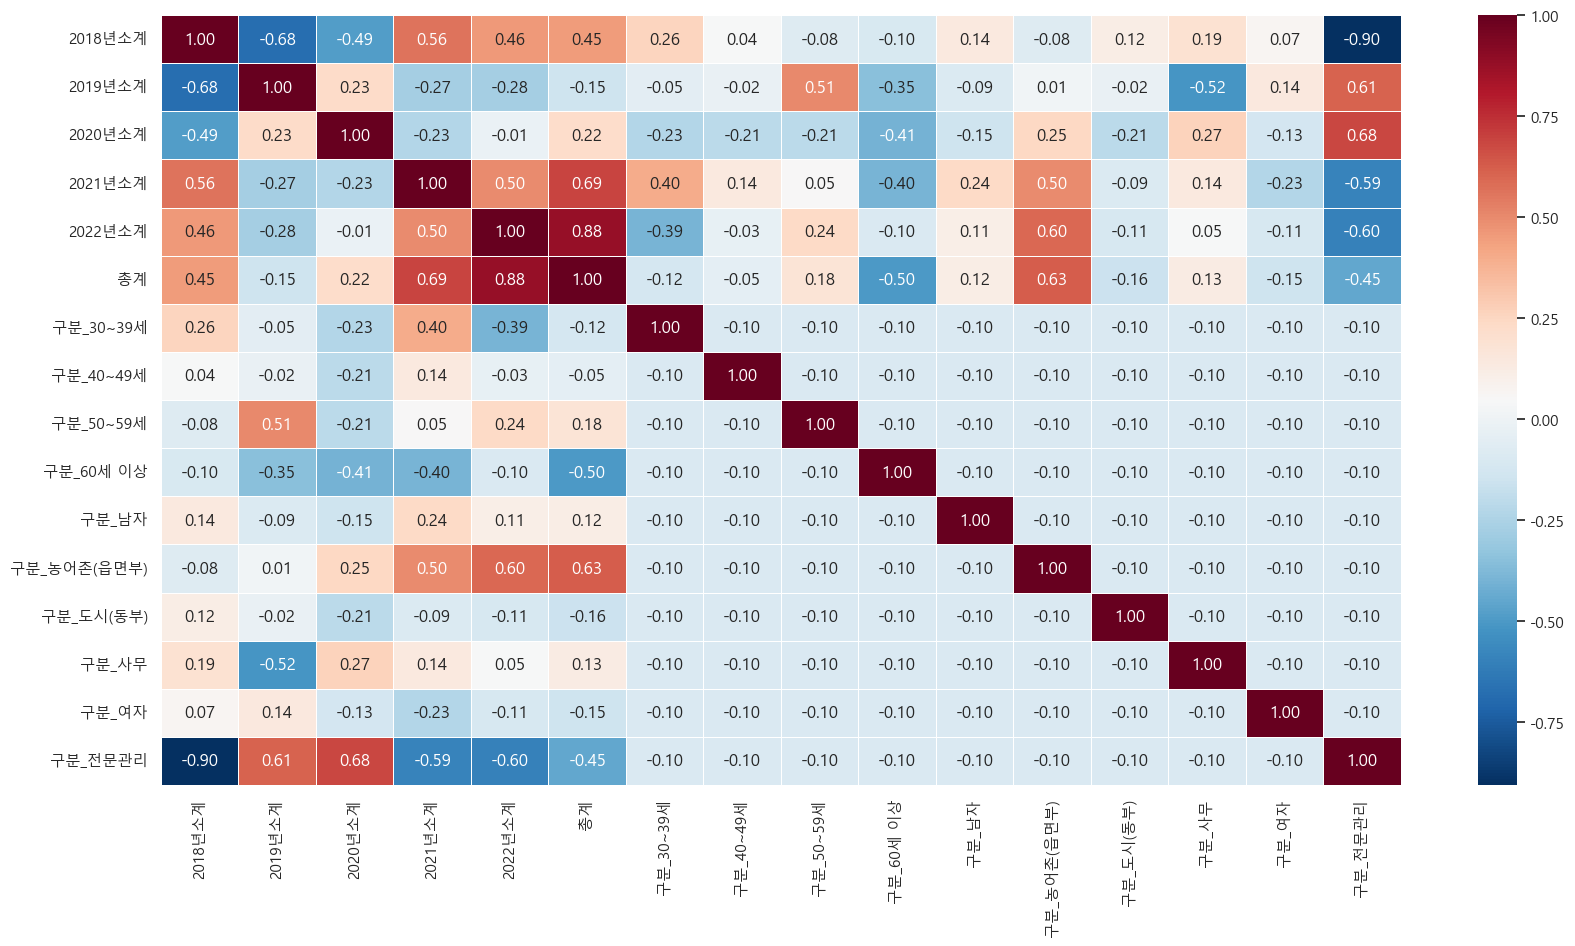

In [131]:
sns.heatmap(data = train_dum.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='RdBu_r')
sns.set_theme(font ='Malgun Gothic',
           rc = {'axes.unicode_minus' : False},
           style ='whitegrid')
plt.show()

In [139]:
## 우울감을 느끼는 사람 
a = ['18','19','20','21','22']
b = ['0','1','2','3','4','5']
dp_1_train = df.copy()
for i in range(0, len(b)):
    dp_1_train = dp_1_train.drop([f'20{a[0]}년{b[i]}점'], axis=1)
    dp_1_train = dp_1_train.drop([f'20{a[1]}년{b[i]}점'], axis=1)
    dp_1_train = dp_1_train.drop([f'20{a[2]}년{b[i]}점'], axis=1)
    dp_1_train = dp_1_train.drop([f'20{a[3]}년{b[i]}점'], axis=1)
    dp_1_train = dp_1_train.drop([f'20{a[4]}년{b[i]}점'], axis=1)
dp_1_train.head()
dp_1_train['2018년소계'] = dp_1_train.iloc[:,:5].sum(axis=1)
dp_1_train['2019년소계'] = dp_1_train.iloc[:,5:10].sum(axis=1)
dp_1_train['2020년소계'] = dp_1_train.iloc[:,10:15].sum(axis=1)
dp_1_train['2021년소계'] = dp_1_train.iloc[:,15:20].sum(axis=1)
dp_1_train['2022년소계'] = dp_1_train.iloc[:,20:25].sum(axis=1)
dp_1_train['총계'] = dp_1_train.iloc[:,25:30].sum(axis=1)
dp_1_total = dp_1_train.iloc[:,-6:]
dp_1_total = dp_1_total.reset_index(level=None,drop=False)

# dp_0_total= pd.get_dummies(dp_0_train,drop_first=True,dtype='int')
# dp_0_total
dp_1_total.to_excel("우울ooo_통계청_소계.xlsx")

In [140]:
dp_1_train.head()

,2018년6점,2018년7점,2018년8점,2018년9점,2018년10점,2019년6점,2019년7점,2019년8점,2019년9점,2019년10점,...,2022년7점,2022년8점,2022년9점,2022년10점,2018년소계,2019년소계,2020년소계,2021년소계,2022년소계,총계
구분,,,,,,,,,,,,,,,,,,,,,
도시(동부),416,256,128,40,32,728,400,144,56,32,...,336,128,8,8,872,1360,1120,1712,1056,6120
농어촌(읍면부),552,232,96,40,24,568,448,232,72,24,...,176,72,24,8,944,1344,944,1504,624,5360
남자,400,240,144,40,40,680,464,136,72,40,...,296,104,8,8,864,1392,1096,1600,912,5864
여자,480,272,96,32,16,728,352,176,48,24,...,328,128,16,8,896,1328,1088,1760,1064,6136
19~29세,472,224,88,16,8,752,440,136,72,8,...,312,80,0,8,808,1408,896,1736,776,5624


In [169]:
train_dp = pd.read_excel("우울ooo_통계청_소계.xlsx")
train_dp = train_dp.drop("Unnamed: 0",axis=1)


In [170]:
train_dp

,구분,2018년소계,2019년소계,2020년소계,2021년소계,2022년소계,총계
0,도시(동부),872,1360,1120,1712,1056,6120
1,농어촌(읍면부),944,1344,944,1504,624,5360
2,남자,864,1392,1096,1600,912,5864
3,여자,896,1328,1088,1760,1064,6136
4,19~29세,808,1408,896,1736,776,5624
5,30~39세,832,1360,1128,1536,1208,6064
6,40~49세,904,1368,1096,1624,1008,6000
7,50~59세,936,1256,1128,1656,848,5824
8,60세 이상,952,1440,1192,1808,1064,6456
9,전문관리,1216,1208,744,1872,1344,6384


In [171]:
train_dp_dum = pd.get_dummies(train_dp.loc[10:, :], drop_first=True, dtype='int')
print(train_dp_dum)

    2018년소계  2019년소계  2020년소계  2021년소계  2022년소계    총계  구분_100만원 미만  \
10      864     1480      936     1624      952  5856            0   
11      848     1400     1040     1744      960  5992            0   
12      768      904     1152     1616      432  4872            0   
13      920     1496     1288     1400     1080  6184            0   
14     1536     1656     1656     2376     1336  8560            1   
15     1008     1472     1608     1648     1024  6760            0   
16      976     1456     1264     1832      952  6480            0   
17      768     1320      992     1400     1040  5520            0   
18      816     1216      872     1472      808  5184            0   
19      616     1264      936     1616      944  5376            0   
20     1000     1456      920     1768     1040  6184            0   
21     1344     1496     1376     1552      992  6760            0   
22      952     1640     1288     1728      944  6552            0   
23      784     1352

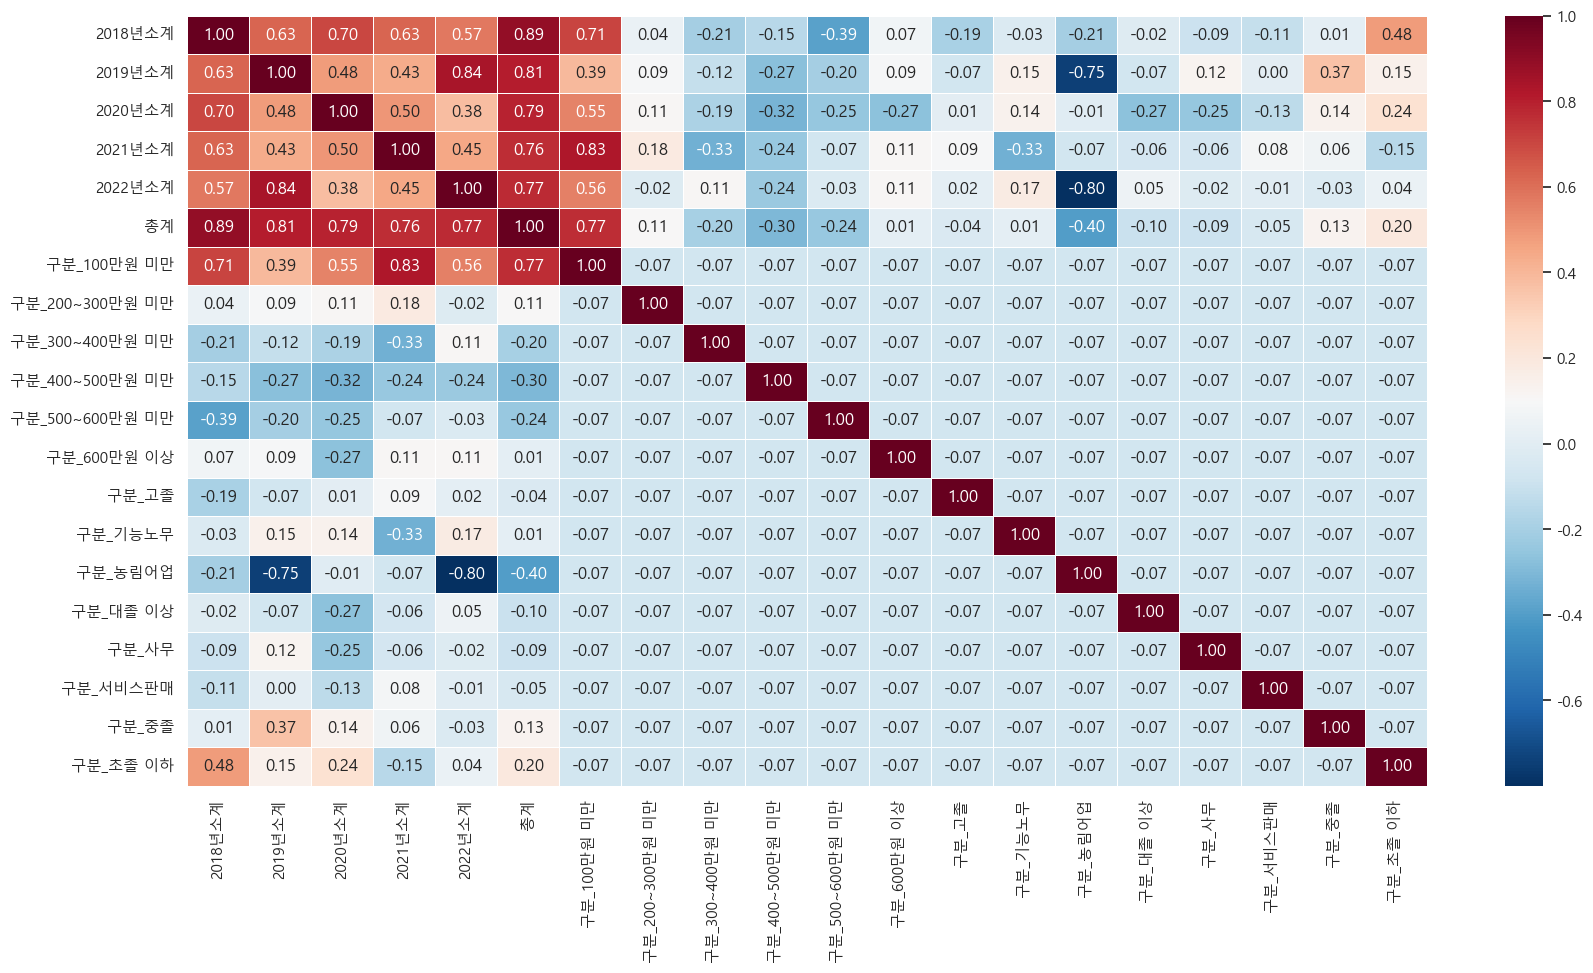

In [172]:
sns.heatmap(data = train_dp_dum.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='RdBu_r')
sns.set_theme(font ='Malgun Gothic',
           rc = {'axes.unicode_minus' : False},
           style ='whitegrid')
plt.show()

In [173]:
train_dp.head()

,구분,2018년소계,2019년소계,2020년소계,2021년소계,2022년소계,총계
0,도시(동부),872,1360,1120,1712,1056,6120
1,농어촌(읍면부),944,1344,944,1504,624,5360
2,남자,864,1392,1096,1600,912,5864
3,여자,896,1328,1088,1760,1064,6136
4,19~29세,808,1408,896,1736,776,5624


In [175]:

train.rename(columns ={'총계':'우울감x'},inplace=True)



TypeError: Series.rename() got an unexpected keyword argument 'columns'

In [178]:

train = pd.DataFrame(train,columns=['우울감x'])
train

,우울감x
0,33872
1,34624
2,34136
3,33880
4,34376
5,33904
6,33976
7,34192
8,33544
9,33592


In [179]:
train_dp.rename(columns ={'총계':'우울감o'},inplace=True)
train_dp=train_dp['우울감o']


0     6120
1     5360
2     5864
3     6136
4     5624
5     6064
6     6000
7     5824
8     6456
9     6384
10    5856
11    5992
12    4872
13    6184
14    8560
15    6760
16    6480
17    5520
18    5184
19    5376
20    6184
21    6760
22    6552
23    6032
24    5824
Name: 우울감o, dtype: int64

In [180]:
train_dp = pd.DataFrame(train_dp,columns=['우울감o'])
train_dp

,우울감o
0,6120
1,5360
2,5864
3,6136
4,5624
5,6064
6,6000
7,5824
8,6456
9,6384


In [182]:
category = pd.read_excel("우울ooo_통계청_소계.xlsx")
category = category.drop("Unnamed: 0",axis=1)['구분']
category

0           도시(동부)
1         농어촌(읍면부)
2               남자
3               여자
4           19~29세
5           30~39세
6           40~49세
7           50~59세
8           60세 이상
9             전문관리
10              사무
11           서비스판매
12            농림어업
13            기능노무
14        100만원 미만
15    100~200만원 미만
16    200~300만원 미만
17    300~400만원 미만
18    400~500만원 미만
19    500~600만원 미만
20        600만원 이상
21           초졸 이하
22              중졸
23              고졸
24           대졸 이상
Name: 구분, dtype: object

In [201]:
real_last = pd.concat([category,train],axis=1)
real_last = pd.concat([real_last,train_dp],axis=1)
real_last



,구분,우울감x,우울감o
0,도시(동부),33872,6120
1,농어촌(읍면부),34624,5360
2,남자,34136,5864
3,여자,33880,6136
4,19~29세,34376,5624
5,30~39세,33904,6064
6,40~49세,33976,6000
7,50~59세,34192,5824
8,60세 이상,33544,6456
9,전문관리,33592,6384


In [202]:
from scipy.stats import chi2_contingency

In [206]:
indexs = real_last['구분']
real_last = real_last.set_index(keys=indexs)
real_last = real_last.drop('구분',axis=1)
region = real_last.iloc[:2,:]
region

,우울감x,우울감o
구분,,
도시(동부),33872,6120
농어촌(읍면부),34624,5360


In [209]:
result_region = chi2_contingency(observed=region,correction=False)
print("1. 카이제곱 통계량:", result_region[0])
print("2. p-value:", result_region[1])
print("3. df:", result_region[2]) #(행의개수-1)*(열의개수-1)
print("4. 기대값 행렬:")
pd.DataFrame(result_region[3]).rename(index={0:'도시(동부)', 1:'농어촌(읍면부)'}, columns={0:'우울감x', 1:'우울감o'})
 

1. 카이제곱 통계량: 58.56880414591977
2. p-value: 1.9630448291790828e-14
3. df: 1
4. 기대값 행렬:


,우울감x,우울감o
도시(동부),34251.425828,5740.574172
농어촌(읍면부),34244.574172,5739.425828


In [210]:

gender = real_last.iloc[2:4,:]
result_gender = chi2_contingency(observed=gender,correction=False)
print("1. 카이제곱 통계량:", result_gender[0])
print("2. p-value:", result_gender[1])
print("3. df:", result_gender[2]) #(행의개수-1)*(열의개수-1)
print("4. 기대값 행렬:")
pd.DataFrame(result_gender[3]).rename(index={0:'남자', 1:'여자'}, columns={0:'우울감x', 1:'우울감o'})


1. 카이제곱 통계량: 7.125672249179197
2. p-value: 0.00759879183133254
3. df: 1
4. 기대값 행렬:


,우울감x,우울감o
남자,34001.19976,5998.80024
여자,34014.80024,6001.19976


In [211]:
real_last

,우울감x,우울감o
구분,,
도시(동부),33872,6120
농어촌(읍면부),34624,5360
남자,34136,5864
여자,33880,6136
19~29세,34376,5624
30~39세,33904,6064
40~49세,33976,6000
50~59세,34192,5824
60세 이상,33544,6456


In [219]:
age

,우울감x,우울감o
구분,,
19~29세,34376,5624
30~39세,33904,6064
40~49세,33976,6000
50~59세,34192,5824
60세 이상,33544,6456


In [220]:
age = real_last.iloc[4:9,:]
result_age = chi2_contingency(observed=age,correction=False)
print("1. 카이제곱 통계량:", result_age[0])
print("2. p-value:", result_age[1])
print("3. df:", result_age[2]) #(행의개수-1)*(열의개수-1)
print("4. 기대값 행렬:")
pd.DataFrame(result_age[3]).rename(index={0:'19~29세', 1:'30~39세',2:'40~49세',3:'50~59세',4:'60세 이상'}, columns={0:'우울감x', 1:'우울감o'})


1. 카이제곱 통계량: 75.68949432238799
2. p-value: 1.4241883794540415e-15
3. df: 4
4. 기대값 행렬:


,우울감x,우울감o
19~29세,34005.201040,5994.798960
30~39세,33977.996879,5990.003121
40~49세,33984.797920,5991.202080
50~59세,34018.803121,5997.196879
60세 이상,34005.201040,5994.798960


In [222]:
work = real_last.iloc[9:14,:]
result_work = chi2_contingency(observed=work,correction=False)
print("1. 카이제곱 통계량:", result_work[0])
print("2. p-value:", result_work[1])
print("3. df:", result_work[2]) #(행의개수-1)*(열의개수-1)
print("4. 기대값 행렬:")
pd.DataFrame(result_work[3]).rename(index={0:'전문관리', 1:'사무',2:'서비스판매',3:'농림어업',4:'기능노무'}, columns={0:'우울감x', 1:'우울감o'})


1. 카이제곱 통계량: 276.0314623099536
2. p-value: 1.598061511140325e-58
3. df: 4
4. 기대값 행렬:


,우울감x,우울감o
전문관리,34122.616966,5853.383034
사무,34143.102828,5856.897172
서비스판매,34170.417310,5861.582690
농림어업,34156.760069,5859.239931
기능노무,34143.102828,5856.897172


In [217]:
real_last

,우울감x,우울감o
구분,,
도시(동부),33872,6120
농어촌(읍면부),34624,5360
남자,34136,5864
여자,33880,6136
19~29세,34376,5624
30~39세,33904,6064
40~49세,33976,6000
50~59세,34192,5824
60세 이상,33544,6456


In [223]:
wage = real_last.iloc[14:21,:]
result_wage = chi2_contingency(observed=wage,correction=False)
print("1. 카이제곱 통계량:", result_wage[0])
print("2. p-value:", result_wage[1])
print("3. df:", result_wage[2]) #(행의개수-1)*(열의개수-1)
print("4. 기대값 행렬:")
pd.DataFrame(result_wage[3]).rename(index={0:'100만원 미만', 1:'100~200만원 미만',2:'200~300만원 미만',3:'300~400만원 미만',4:'400~500만원 미만',5:'500~600만원 미만',6:'600만원 이상'}, columns={0:'우울감x', 1:'우울감o'})


1. 카이제곱 통계량: 1520.9405094594038
2. p-value: 0.0
3. df: 6
4. 기대값 행렬:


,우울감x,우울감o
100만원 미만,33719.704279,6296.295721
100~200만원 미만,33699.480546,6292.519454
200~300만원 미만,33712.963035,6295.036965
300~400만원 미만,33719.704279,6296.295721
400~500만원 미만,33712.963035,6295.036965
500~600만원 미만,33706.221791,6293.778209
600만원 이상,33712.963035,6295.036965


In [224]:
education = real_last.iloc[21:25,:]
result_education = chi2_contingency(observed=education,correction=False)
print("1. 카이제곱 통계량:", result_education[0])
print("2. p-value:", result_education[1])
print("3. df:", result_education[2]) #(행의개수-1)*(열의개수-1)
print("4. 기대값 행렬:")
pd.DataFrame(result_education[3]).rename(index={0:'초졸 이하', 1:'중졸',2:'고졸',3:'대졸 이상'}, columns={0:'우울감x', 1:'우울감o'})


1. 카이제곱 통계량: 107.75122449104535
2. p-value: 3.343843367962813e-23
3. df: 3
4. 기대값 행렬:


,우울감x,우울감o
초졸 이하,33708.943658,6291.056342
중졸,33729.169025,6294.830975
고졸,33708.943658,6291.056342
대졸 이상,33708.943658,6291.056342
